In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citi_data = pd.read_csv(city_data_to_load).dropna()
ride_data = pd.read_csv(ride_data_to_load).dropna()

# Combine the data into a single dataset
combined_data = ride_data.merge(citi_data, on="city", how="left")

# Display the data table for preview

#combined_data_show.head()
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

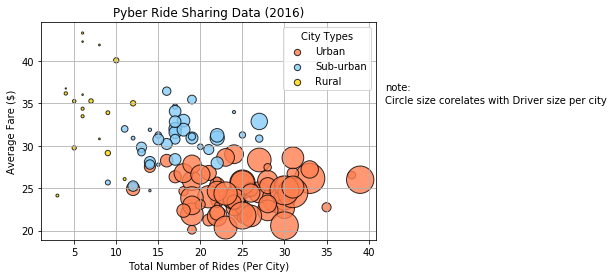

In [50]:
# Obtain the x and y coordinates for each of the three city types
urban_citydate = combined_data.loc[combined_data["type"] =='Urban', :]
suburban_citydate = combined_data.loc[combined_data["type"] =='Suburban', :]
rural_citydate = combined_data.loc[combined_data["type"] =='Rural', :]
#suburban_citydate.head()
grouped_urban_citydate = urban_citydate.groupby('city')
grouped_suburban_citydate = suburban_citydate.groupby('city')
grouped_rural_citydate = rural_citydate.groupby('city')
#grouped_suburban_citydate.head()

urban_city_ride = grouped_urban_citydate['ride_id'].count()
urban_city_fare = grouped_urban_citydate['fare'].mean()
urban_city_driver_count = grouped_urban_citydate['driver_count'].sum()

suburban_city_ride = grouped_suburban_citydate['ride_id'].count()
suburban_city_fare = grouped_suburban_citydate['fare'].mean()
suburban_city_driver_count = grouped_suburban_citydate['driver_count'].sum()

rural_city_ride = grouped_rural_citydate['ride_id'].count()
rural_city_fare = grouped_rural_citydate['fare'].mean()
rural_city_driver_count = grouped_rural_citydate['driver_count'].sum()

#plt.figure(20,10)
# Build the scatter plots for each city types
plt.scatter(urban_city_ride, urban_city_fare, marker="o", facecolors="coral", edgecolors="black", s=.4*urban_city_driver_count, alpha=0.8, label='Urban')
plt.scatter(suburban_city_ride, suburban_city_fare, marker="o", facecolors="lightskyblue", edgecolors="black", s=.4*suburban_city_driver_count, alpha=0.8,label='Sub-urban')
plt.scatter(rural_city_ride, rural_city_fare, marker="o", facecolors="gold", edgecolors="black", s=.4*rural_city_driver_count, alpha=0.8, label='Rural')

# Incorporate the other graph properties

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)


# Create a legend
lgnd=plt.legend(loc='upper right', title = 'City Types',markerscale=.5)

lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
# Incorporate a text label regarding circle size

plt.text(42,36.5, "note:", fontsize=10)
plt.text(42,35, "Circle size corelates with Driver size per city", fontsize=10)
#plt.tight_layout()
# Save Figure
plt.savefig("../Images/PyberRideSharing.png")
plt.show()


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

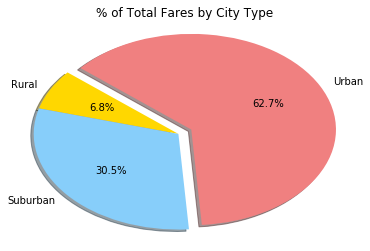

In [95]:
# Calculate Type Percents
type_data= combined_data.groupby('type')
sizes=type_data['fare'].sum()


# Build Pie Chart

colors_my = ['gold', 'lightskyblue', 'lightcoral']

labels = type_data['type'].unique().astype(str).str.replace('\[|\]|\'', '')

explode_chart = (0, 0, 0.1)

plt.pie(sizes, explode=explode_chart, labels=labels, autopct="%1.1f%%", colors=colors_my, shadow=True, startangle=140 )
plt.title('% of Total Fares by City Type')
plt.axis("auto")

# Save Figure
plt.savefig("../Images/PyberFarebyCityType.png")

In [88]:
# Show Figure
plt.show()

## Total Rides by City Type

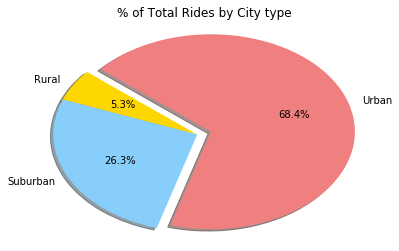

In [89]:
# Calculate Ride Percents
#type_data= combined_data.groupby('type')
sizes=type_data['ride_id'].count()

# Build Pie Chart

plt.pie(sizes, explode=explode_chart, labels=labels,autopct="%1.1f%%", colors=colors_my, shadow=True, startangle=140 )
plt.title('% of Total Rides by City type')
plt.axis("auto")

# Save Figure
plt.savefig("../Images/PyberRidesbyCityType.png")

In [90]:
# Show Figure
plt.show()

## Total Drivers by City Type

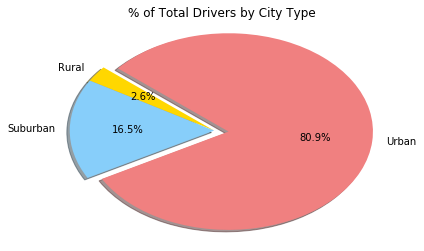

In [91]:
# Calculate Driver Percents
type_data= citi_data.groupby('type')
sizes=type_data['driver_count'].sum()

# Build Pie Chart
plt.pie(sizes, explode=explode_chart, labels=labels,autopct="%1.1f%%", colors=colors_my, shadow=True, startangle=140 )
plt.title('% of Total Drivers by City Type')
plt.axis("auto")
# Save Figure
plt.savefig("../Images/PyberDriverbyCityType.png")

In [12]:
# Show Figure
plt.show()